## Imports de utilidad


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
from src.Metrics.metrics_utils import get_hist_from_str, plot_10,evaluate_all_features,plot_histogram,similarity_metric, query_image, evaluate_query
from src.SIFT.SIFT_gen_and_utils import SIFTFeatures
from tqdm import notebook
config = yaml.load(open('/root/labint/LabInt/LabInt/config/full_images_to_hist_config.yaml', 'r'), Loader=yaml.FullLoader)
n_bins = config['clusterization_config']['n_clusters']

In [11]:
df = pd.read_csv('/root/labint/LabInt/LabInt/csv/total_histogram_CNN.csv')
SIFT = SIFTFeatures("", "", run=False)
# get all images from the same class
df["class"] = df["image_name"].apply(lambda x: SIFT.get_class(x))
df["features_histogram"] = df["features_histogram"].apply(lambda x: get_hist_from_str(x, separator=' '))

df.head()

In [91]:
#PARAMETROS GLOBALES
IMAGE_EXAMPLE = df["image_name"][0]
MEASURE = 'cosine'


## Método Handcrafted


In [92]:
df.head()

,image_name,features_histogram,features_CNN,class
0,0_430b273cb7915d83.jpg,"[0.00891516, 0.01386802, 0.00924535, 0.0089151...","[0.029053612, 0.005296911, 0.04431615, 8.36852...",0_type1
1,0_8c54ccf63a12ee74.jpg,"[0.01114108, 0.00788027, 0.00652161, 0.0067933...","[0.02466255, 0.000653582, 0.028425196, 0.00015...",0_type1
2,0_c8f198d7da690cc8.jpg,"[0.00954264, 0.0126586, 0.0085689, 0.00837415,...","[0.026438147, 0.0029341085, 0.03634543, -0.002...",0_type1
3,100001.jpg,"[0.00292408, 0.00988136, 0.0033274, 0.00846974...","[0.029428592, 0.00525929, 0.044686396, 0.00075...",0_type2
4,1000_nm1265067_rm1814797056_1975-7-6_2006.jpg,"[0.0123984, 0.0, 0.0247968, 0.0, 0.0, 0.004132...","[0.011611224, 0.007402856, 0.045435827, -0.002...",1000_type1


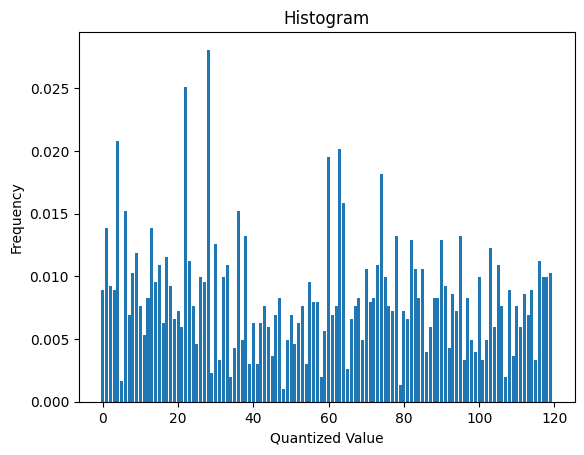

In [93]:
plot_histogram(df, 0, 120,feature_type="histogram")

In [94]:
image_example = df["image_name"][1000]
df_query_hand = query_image(df, IMAGE_EXAMPLE, measure=MEASURE, feature_type = "histogram")
df_query_hand

,image_name,features_histogram,features_CNN,class,similarity
0,0_430b273cb7915d83.jpg,"[0.00891516, 0.01386802, 0.00924535, 0.0089151...","[0.029053612, 0.005296911, 0.04431615, 8.36852...",0_type1,0.000000
1,283_48d56dde4ff947636e6d2e88fe0944d7.jpg,"[0.00996485, 0.00996485, 0.00996485, 0.0101602...","[0.020358194, 0.0023548284, 0.013760073, 2.647...",283_type1,0.054444
2,445_sketch_32.JPEG,"[0.00770769, 0.01268805, 0.00889349, 0.0088934...","[0.021581432, 0.008826437, 0.047995437, -0.002...",445_type1,0.060710
3,48_5242ac0bf47e7b3a.jpg,"[0.01037963, 0.00834883, 0.00947705, 0.0094770...","[0.008390966, -0.0010573659, 0.00018312386, -0...",48_type1,0.061330
4,302_592813d0442d8954ad830cf27415c95c.jpg,"[0.00871297, 0.00789099, 0.01512441, 0.0096993...","[0.014047221, 0.0009004294, 0.016000567, -0.00...",302_type1,0.061934
...,...,...,...,...,...
13486,127403.jpg,"[0.13143483, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0024649568, -0.0015996612, -0.010609595, -0...",274_type2,0.922494
13487,125800.jpg,"[0.00736648, 0.0, 0.0, 0.0, 0.0, 0.02209945, 0...","[0.003477759, -0.0015510956, -0.009509206, -0....",258_type2,0.944250
13488,127400.jpg,"[0.25974026, 0.0, 0.0, 0.0, 0.0, 1.2987013, 0....","[0.0026232037, -0.0017764382, -0.010863064, -0...",274_type2,0.949583
13489,125802.jpg,"[0.0075221, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0034494845, -0.0015961293, -0.009617011, -0...",258_type2,0.953769


In [95]:
df['features_histogram'][1000].shape

(120,)

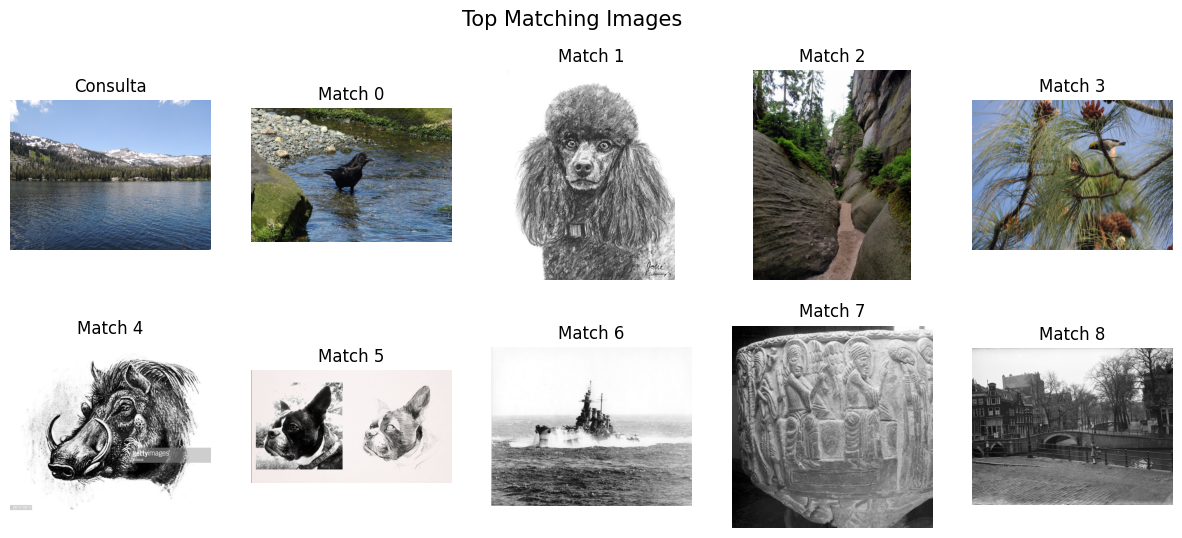

In [96]:
def plot_10(df_, path_to_images):
    fig,ax = plt.subplots(nrows=2,ncols=5,figsize=(15, 6))
    fig.suptitle("Top Matching Images", fontsize=15)
    ax[0][0].set_title(f"Consulta")
    x = 0
    for j in range(0, 2):
        for i in range(0,5): 
            ax[j][i].set_axis_off()
            ax[j][i].imshow(Image.open(f'{path_to_images}/{df_["image_name"][x]}'))
            if x > 0:
                ax[j][i].set_title(f"Match {x-1}")
            x +=1
    plt.show()

path_to_images = '/root/labint/scripts/LabInt/data/GPR1200/images'
plot_10(df_query_hand,path_to_images)

In [130]:
# count how many different classes are
df["class"].nunique()

1700

In [98]:
# evaluating ranking method
image_example = df["image_name"][0]
evaluate_query(df, IMAGE_EXAMPLE, measure=MEASURE, normalized=True)


0_type1
[0, 105, 316, 369, 518, 866, 1032, 1274, 2055, 2829]


0.07675075564779812

## Método por Redes Convolucionales

In [99]:

import tqdm

import os
from PIL import Image

def launch_CNN(df):
    from src.CNN.CNN_utils import  CNN_method, deep_rank_model
    model = deep_rank_model()
    model.load_weights(input())

    def load_single(path):
        image = Image.open(os.path.join(path))
        return image

    CNN_method(load_single(f'/root/labint/scripts/LabInt/data/GPR1200/images/{df["image_name"][0]}'), model)

    def apply_cnn(image, CNN_method):
        try:
            return CNN_method(image, model)
        except:
            return np.zeros(4096)

    df["features_CNN"] = tqdm.tqdm(df["image_name"].apply(lambda x: apply_cnn(load_single(f'/root/labint/scripts/LabInt/data/GPR1200/images/{x}'), CNN_method), model))
    df.to_csv('../dataset/total_quant_histogram_cnn_features.csv', index=False)
 

In [100]:
gg = get_hist_from_str(df['features_CNN'][0], separator = ',')
gg.shape

(4096,)

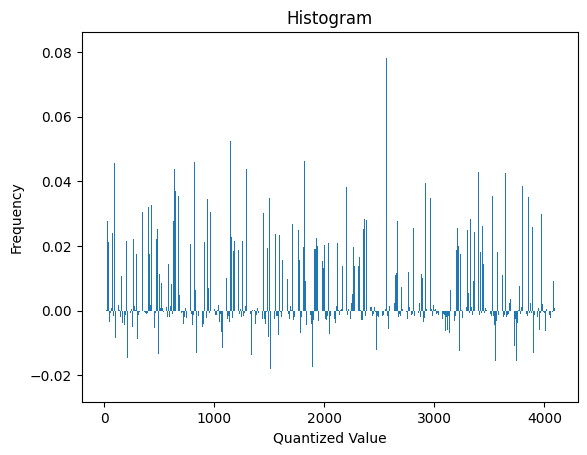

In [101]:
plot_histogram(df,0,n_bins=4096, feature_type='CNN')

In [131]:
#convert each row to numpyy array 
from tqdm import notebook
for index,row in notebook.tqdm(df.iterrows()):
    df.at[index, 'features_CNN'] = get_hist_from_str(df.at[index, 'features_CNN'], separator=',')

0it [00:00, ?it/s]

In [132]:
print(df['features_CNN'][0])
print(type(df['features_CNN'][0]))

[ 0.02905361  0.00529691  0.04431615 ...  0.03970027 -0.00438279
  0.00016648]
<class 'numpy.ndarray'>


In [104]:
image_example = df["image_name"][0]
df_query_CNN = query_image(df,IMAGE_EXAMPLE, measure=MEASURE, feature_type = "CNN")
df_query_CNN.head()

,image_name,features_histogram,features_CNN,class,similarity
0,0_430b273cb7915d83.jpg,"[0.00891516, 0.01386802, 0.00924535, 0.0089151...","[0.029053612, 0.005296911, 0.04431615, 8.36852...",0_type1,-1.192093e-07
1,128400.jpg,"[0.00867227, 0.01663866, 0.00373109, 0.0110924...","[0.026536468, 0.006892562, 0.042116687, 0.0011...",284_type2,4.449189e-03
2,134300.jpg,"[0.00897479, 0.01068908, 0.00635294, 0.0083697...","[0.02729461, 0.0052069454, 0.042228706, 0.0006...",343_type2,4.766345e-03
3,113300.jpg,"[0.00369548, 0.00854579, 0.00485031, 0.0064670...","[0.026739892, 0.0052878833, 0.041170012, -0.00...",133_type2,5.301118e-03
4,107700.jpg,"[0.00660526, 0.00220175, 0.00660526, 0.0066052...","[0.028466465, 0.0054746494, 0.04325634, -0.002...",77_type2,6.046534e-03


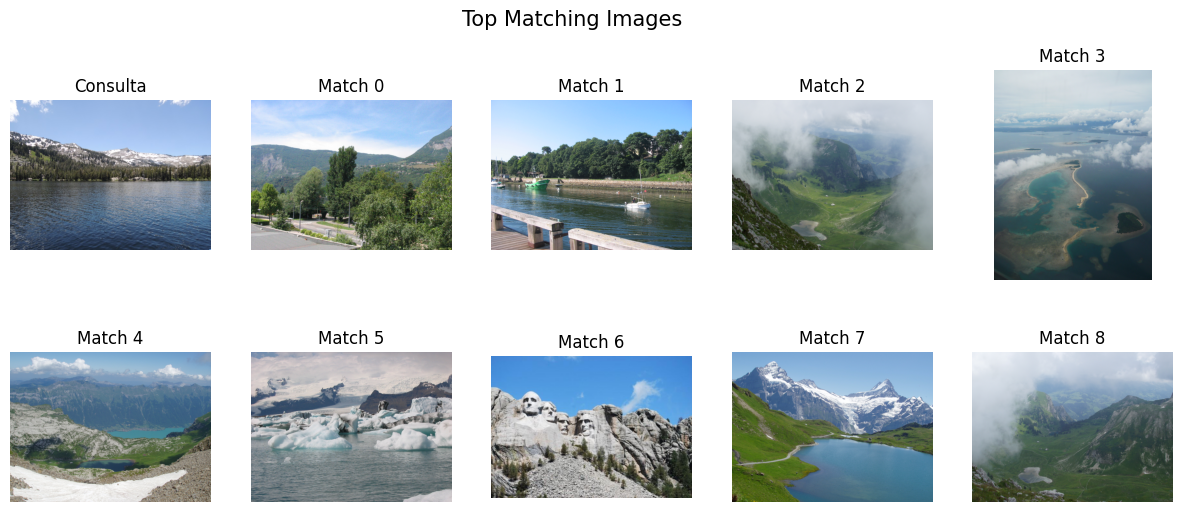

In [105]:
plot_10(df_query_CNN,path_to_images)

In [106]:
evaluate_query(df, IMAGE_EXAMPLE, measure=MEASURE, normalized=True,feature_type = "CNN")

0_type1
[0, 428, 575, 657, 1248, 1492, 1797, 2241, 2396, 4500]


0.12591933717128292

## Fusión de Ranking

In [133]:
#concat process
print(df.shape)
save = pd.DataFrame(np.concatenate([df['features_CNN'][0], df['features_histogram'][0]]))

df['features_fusion'] = [np.concatenate([df['features_CNN'][x], df['features_histogram'][x]]) for x in range(df.shape[0])]

lda_df = np.array([df['features_fusion'][x] for x in range(0,df.shape[0])])
print(lda_df.shape)

(13491, 4)
(13491, 4216)


In [134]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train = lda_df

y_train =label_encoder.fit_transform(df['class'])
#print(X_train)
#print(y_train)
print(X_train.shape)
print(y_train.shape)#

print(X_train[0].shape)
#print(y_train[0])

(13491, 4216)
(13491,)
(4216,)


In [135]:
# Instantiate the LinearDiscriminantAnalysis model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [136]:
X_train_lda = lda.transform(X_train) 

In [137]:
print(X_train_lda.shape)

(13491, 1698)


In [139]:
df['features_fusion'] =   [np.array(X_train_lda[i]) for i in range(X_train_lda.shape[0])]

In [143]:
df.head()

,image_name,features_histogram,features_CNN,class,features_fusion
0,0_430b273cb7915d83.jpg,"[0.00891516, 0.01386802, 0.00924535, 0.0089151...","[0.029053612, 0.005296911, 0.04431615, 8.36852...",0_type1,"[-2.613821145742236, 2.587963542480173, -0.439..."
1,0_8c54ccf63a12ee74.jpg,"[0.01114108, 0.00788027, 0.00652161, 0.0067933...","[0.02466255, 0.000653582, 0.028425196, 0.00015...",0_type1,"[-2.5640103286492733, 4.1776568101211105, -0.2..."
2,0_c8f198d7da690cc8.jpg,"[0.00954264, 0.0126586, 0.0085689, 0.00837415,...","[0.026438147, 0.0029341085, 0.03634543, -0.002...",0_type1,"[-3.9845652390666073, 3.9972214919772657, 0.33..."
3,100001.jpg,"[0.00292408, 0.00988136, 0.0033274, 0.00846974...","[0.029428592, 0.00525929, 0.044686396, 0.00075...",0_type2,"[-2.384346915456419, 8.250267666349039, -5.056..."
4,1000_nm1265067_rm1814797056_1975-7-6_2006.jpg,"[0.0123984, 0.0, 0.0247968, 0.0, 0.0, 0.004132...","[0.011611224, 0.007402856, 0.045435827, -0.002...",1000_type1,"[1.1109833935081854, -3.3930054641721537, -0.5..."


In [149]:
#save preprocess
df['features_CNN'] = str([df['features_CNN'][i] for i in range(df.shape[0])])
#df.drop(columns=['similarity'])
df['features_CNN']

KeyboardInterrupt: 

In [146]:
df.to_csv('final_histograms.csv', index=False)

In [142]:
print(df['features_fusion'][0].shape)

(1698,)


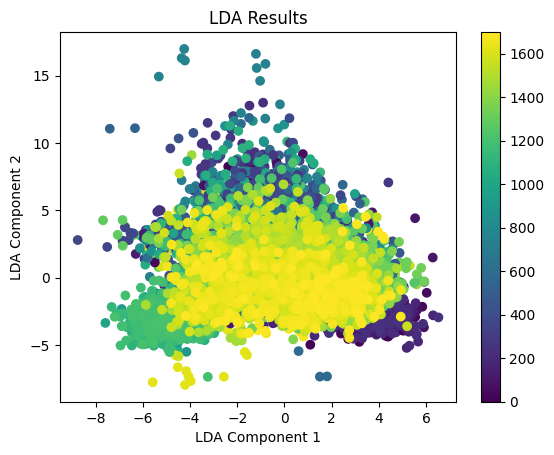

In [113]:
import matplotlib.pyplot as plt

# Create a 2D scatter plot
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Results')
plt.colorbar()
plt.show()

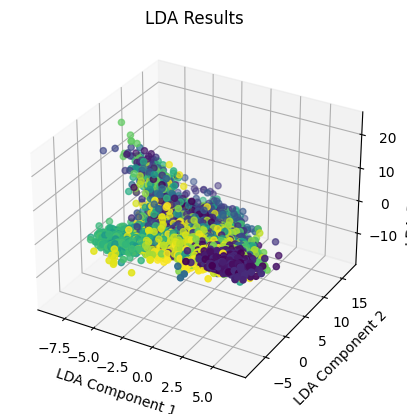

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], X_train_lda[:, 2], c=y_train)
ax.set_xlabel('LDA Component 1')
ax.set_ylabel('LDA Component 2')
ax.set_zlabel('LDA Component 3')
plt.title('LDA Results')
plt.show()

In [115]:
df['features_fusion'][0].shape

(1698,)

In [116]:
df.head()

,image_name,features_histogram,features_CNN,class,similarity,features_fusion
0,0_430b273cb7915d83.jpg,"[0.00891516, 0.01386802, 0.00924535, 0.0089151...","[0.029053612, 0.005296911, 0.04431615, 8.36852...",0_type1,-1.192093e-07,"[-2.613821145742236, 2.587963542480173, -0.439..."
1,0_8c54ccf63a12ee74.jpg,"[0.01114108, 0.00788027, 0.00652161, 0.0067933...","[0.02466255, 0.000653582, 0.028425196, 0.00015...",0_type1,1.660900e-01,"[-2.5640103286492733, 4.1776568101211105, -0.2..."
2,0_c8f198d7da690cc8.jpg,"[0.00954264, 0.0126586, 0.0085689, 0.00837415,...","[0.026438147, 0.0029341085, 0.03634543, -0.002...",0_type1,4.163867e-02,"[-3.9845652390666073, 3.9972214919772657, 0.33..."
3,100001.jpg,"[0.00292408, 0.00988136, 0.0033274, 0.00846974...","[0.029428592, 0.00525929, 0.044686396, 0.00075...",0_type2,4.710650e-02,"[-2.384346915456419, 8.250267666349039, -5.056..."
4,1000_nm1265067_rm1814797056_1975-7-6_2006.jpg,"[0.0123984, 0.0, 0.0247968, 0.0, 0.0, 0.004132...","[0.011611224, 0.007402856, 0.045435827, -0.002...",1000_type1,6.470263e-01,"[1.1109833935081854, -3.3930054641721537, -0.5..."


In [117]:
df_fusion_query = query_image(df, IMAGE_EXAMPLE, measure=MEASURE, feature_type = "fusion")

In [118]:
df_fusion_query.head()

,image_name,features_histogram,features_CNN,class,similarity,features_fusion
0,0_430b273cb7915d83.jpg,"[0.00891516, 0.01386802, 0.00924535, 0.0089151...","[0.029053612, 0.005296911, 0.04431615, 8.36852...",0_type1,1.110223e-16,"[-2.613821145742236, 2.587963542480173, -0.439..."
1,0_8684223b404f7e47.jpg,"[0.00448179, 0.00497977, 0.0129474, 0.01045752...","[0.014586698, -0.0029799812, 0.009695111, -0.0...",0_type1,8.188173e-01,"[-3.006215685289725, 3.372469705192569, -1.783..."
2,0_ff075584fa3ac3fe.jpg,"[0.01184547, 0.01261466, 0.0078457, 0.0115378,...","[0.028333608, 0.0061613913, 0.049231764, -0.00...",0_type1,8.361262e-01,"[-3.3161493896842664, 4.448872519802414, -1.59..."
3,0_b904d301c9f168df.jpg,"[0.01156273, 0.01222981, 0.00956149, 0.0084496...","[0.025408633, 1.6391228e-05, 0.027978683, -0.0...",0_type1,8.598941e-01,"[-2.5008284445195375, 4.5798867534498395, 1.02..."
4,0_618577ba46bc3d04.jpg,"[0.00902748, 0.01086642, 0.00919466, 0.0101977...","[0.021940565, 0.0023942296, 0.024983067, 0.000...",0_type1,8.642501e-01,"[-3.4441016090789867, 3.9837581177537325, -0.4..."


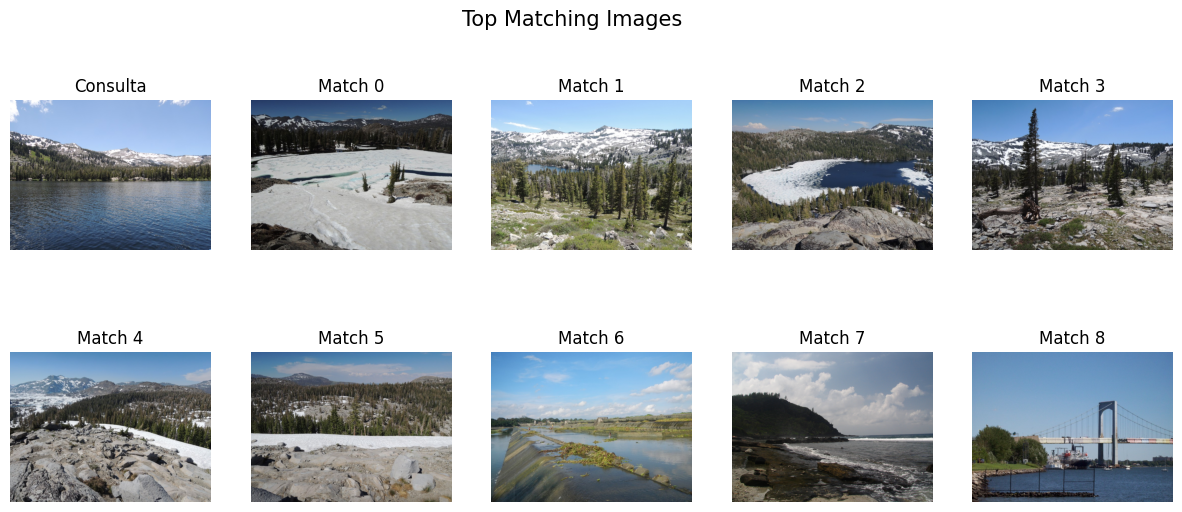

In [119]:
path_to_images = '/root/labint/scripts/LabInt/data/GPR1200/images'
plot_10(df_fusion_query,path_to_images)

In [120]:
evaluate_query(df_fusion_query, image_example, measure=MEASURE, normalized=True,feature_type= "fusion")

0_type1
[0, 1, 2, 3, 4, 5, 6, 13, 26, 137]


0.0012518633821724772

,image_name,features_histogram,features_CNN,class,features_fusion
0,0_430b273cb7915d83.jpg,"[0.00891516, 0.01386802, 0.00924535, 0.0089151...",['<generator object <genexpr> at 0x7f23110b94d...,0_type1,"[-2.613821145742236, 2.587963542480173, -0.439..."
1,0_8c54ccf63a12ee74.jpg,"[0.01114108, 0.00788027, 0.00652161, 0.0067933...",['<generator object <genexpr> at 0x7f23110b94d...,0_type1,"[-2.5640103286492733, 4.1776568101211105, -0.2..."
2,0_c8f198d7da690cc8.jpg,"[0.00954264, 0.0126586, 0.0085689, 0.00837415,...",['<generator object <genexpr> at 0x7f23110b94d...,0_type1,"[-3.9845652390666073, 3.9972214919772657, 0.33..."
3,100001.jpg,"[0.00292408, 0.00988136, 0.0033274, 0.00846974...",['<generator object <genexpr> at 0x7f23110b94d...,0_type2,"[-2.384346915456419, 8.250267666349039, -5.056..."
4,1000_nm1265067_rm1814797056_1975-7-6_2006.jpg,"[0.0123984, 0.0, 0.0247968, 0.0, 0.0, 0.004132...",['<generator object <genexpr> at 0x7f23110b94d...,1000_type1,"[1.1109833935081854, -3.3930054641721537, -0.5..."
...,...,...,...,...,...
13486,9_2880a8b6f793718b.jpg,"[0.00515493, 0.01153723, 0.00957345, 0.0058913...",['<generator object <genexpr> at 0x7f23110b94d...,9_type1,"[-2.7867420816539648, 0.48772546549633866, 2.3..."
13487,9_3132ef918ba51ab2.jpg,"[0.0041328, 0.0078064, 0.006888, 0.0032144, 0....",['<generator object <genexpr> at 0x7f23110b94d...,9_type1,"[-2.681220559536008, 1.113189140870911, 2.8531..."
13488,9_a375246edbdf075f.jpg,"[0.00558239, 0.00580569, 0.01272785, 0.0049125...",['<generator object <genexpr> at 0x7f23110b94d...,9_type1,"[-3.7070877487107743, 0.9821294784843366, 2.68..."
13489,9_ae96695dd68be0b5.jpg,"[0.00671726, 0.01200965, 0.01139899, 0.0073279...",['<generator object <genexpr> at 0x7f23110b94d...,9_type1,"[-1.230852193697406, 0.8451719463056238, 1.915..."


In [121]:
#evaluate_all_features(df, IMAGE_EXAMPLE,measure = MEASURE)

In [122]:
"""from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    #'shrinkage': ['auto', 0.2, 0.5, 0.8],
    'n_components': [1600]
}

lda = LinearDiscriminantAnalysis()

# Perform grid search
grid_search = GridSearchCV(lda, param_grid,verbose=3, cv =2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit the model with the best parameters
best_lda = LinearDiscriminantAnalysis(**best_params)
best_lda.fit(X_train, y_train)"""

"from sklearn.discriminant_analysis import LinearDiscriminantAnalysis\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    'solver': ['svd', 'lsqr', 'eigen'],\n    #'shrinkage': ['auto', 0.2, 0.5, 0.8],\n    'n_components': [1600]\n}\n\nlda = LinearDiscriminantAnalysis()\n\n# Perform grid search\ngrid_search = GridSearchCV(lda, param_grid,verbose=3, cv =2)\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters and best score\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\n# Fit the model with the best parameters\nbest_lda = LinearDiscriminantAnalysis(**best_params)\nbest_lda.fit(X_train, y_train)"